<a href="https://colab.research.google.com/github/exalteded/DSPS/blob/master/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
import pylab as pl
import math
%pylab inline
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels import graphics
from statsmodels.formula import api as smf

Populating the interactive namespace from numpy and matplotlib


In [0]:
m19 = pd.read_csv ("https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/9QKJU2/WOMIZQ", sep = "\t" , header = None)

In [7]:
m19.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.247,0.000000,0.114,--,1.998,-0.6682,0.236,--,NaN,0.0,0.000000
1,0.270,0.264431,0.291,--,3.008,0.0000,1.640,0,NaN,1.0,0.000163
2,0.290,0.247896,0.290,--,4.013,1.1170,2.500,0.2,NaN,1.5,0.007934
3,0.330,0.232262,0.330,--,5.006,2.4760,3.999,1.538,NaN,2.0,0.058189
4,0.379,0.233420,0.380,--,6.015,4.4130,5.000,2.866,NaN,2.5,0.198115


In [8]:
m19

,0,1,2,3,4,5,6,7,8,9,10
0,0.247,0.000000,0.114,--,1.998,-0.6682,0.236,--,NaN,0.0,0.000000
1,0.270,0.264431,0.291,--,3.008,0.0000,1.640,0,NaN,1.0,0.000163
2,0.290,0.247896,0.290,--,4.013,1.1170,2.500,0.2,NaN,1.5,0.007934
3,0.330,0.232262,0.330,--,5.006,2.4760,3.999,1.538,NaN,2.0,0.058189
4,0.379,0.233420,0.380,--,6.015,4.4130,5.000,2.866,NaN,2.5,0.198115
5,0.430,0.270713,0.430,--,7.016,6.7880,6.000,4.529,NaN,3.0,0.457108
6,0.480,0.397126,0.480,--,8.019,8.7080,7.000,6.788,NaN,3.5,0.842057
7,0.530,0.356825,0.530,--,9.003,11.0580,8.000,9.067,NaN,4.0,1.345640
8,0.619,0.423466,0.619,--,10.022,14.6680,9.000,11.417,NaN,4.5,1.954560
9,0.779,0.544550,0.779,--,15.131,25.1980,10.000,13.677,NaN,5.0,2.654560


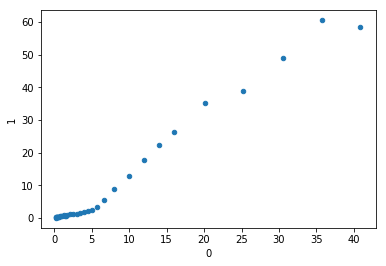

In [17]:

m19.plot(x=0, y = 1, kind = "scatter")

In [22]:
newdroppeddataframe = m19[[0,1]].dropna().rename(columns={0:"T",1:"n"})
newdroppeddataframe

,T,n
0,0.247,0.000000
1,0.270,0.264431
2,0.290,0.247896
3,0.330,0.232262
4,0.379,0.233420
5,0.430,0.270713
6,0.480,0.397126
7,0.530,0.356825
8,0.619,0.423466
9,0.779,0.544550


In [0]:
sm1 = smf.ols("n~T", data = newdroppeddataframe).fit()
sm1.summary()
sm2 = smf.ols("n~pow(T,2)+T", data = newdroppeddataframe).fit()
sm3rdegree = smf.ols("n~pow(T,3) +pow(T,2)+T", data = newdroppeddataframe).fit()


In [49]:
sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.03e-30
Time:                        20:43:25   Log-Likelihood:                -78.878
No. Observations:                  35   AIC:                             161.8
Df Residuals:                      33   BIC:                             164.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8884      0.492     -3.841      0.001      -2.889      -0.888
T              1.6176      0.038     42.577      0.000       1.540       1.695
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.041
Skew:                          -0.420   Prob(JB):                        0.594
Kurtosis:                       2.905   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     879.5
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.08e-28
Time:                        20:43:30   Log-Likelihood:                -78.866
No. Observations:                  35   AIC:                             163.7
Df Residuals:                      32   BIC:                             168.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9344      0.592     -3.266      0.003      -3.141      -0.728
pow(T, 2)     -0.0005      0.004     -0.144      0.886      -0.008       0.007
T              1.6354      0.129     12.652      0.000       1.372       1.899
==============================================================================
Omnibus:                        1.219   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.984
Skew:                          -0.399   Prob(JB):                        0.611
Kurtosis:                       2.809   Cond. No.                         608.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
sm3rdegree.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1433.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.54e-33
Time:                        20:43:37   Log-Likelihood:                -62.858
No. Observations:                  35   AIC:                             133.7
Df Residuals:                      31   BIC:                             139.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4186      0.441     -0.949      0.350      -1.318       0.481
pow(T, 3)     -0.0015      0.000     -6.811      0.000      -0.002      -0.001
pow(T, 2)      0.0827      0.012      6.649      0.000       0.057       0.108
T              0.5900      0.175      3.380      0.002       0.234       0.946
==============================================================================
Omnibus:                        3.084   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                1.813
Skew:                          -0.397   Prob(JB):                        0.404
Kurtosis:                       3.784   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

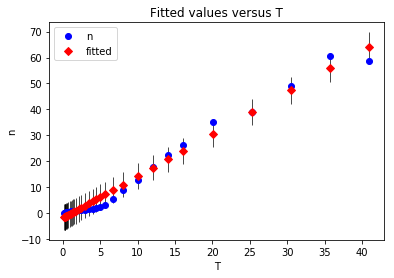

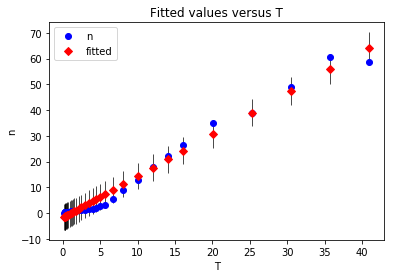

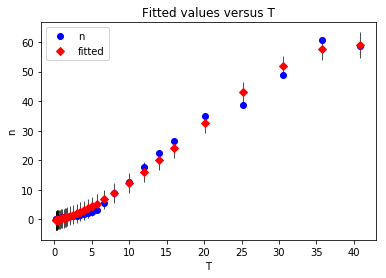

In [38]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(sm1, "T", ax=ax)
fig1, ax = plt.subplots()
fig1 = sm.graphics.plot_fit(sm2, "T", ax=ax)
fig2, ax = plt.subplots()
fig2 = sm.graphics.plot_fit(sm3rdegree, "T", ax=ax)

In [11]:
print("line model log-likelihood: {}".format(sm1.llf))
print("parabola model log-likelihood: {} ".format(sm2.llf))
print("order 3 polynomial model log-likelihood: {}".format(sm3rdegree.llf))

line model log-likelihood: -78.87784843905396
parabola model log-likelihood: -78.86648743639073 
order 3 polynomial model log-likelihood: -62.85756267370933


In [12]:
sm2.compare_lr_test(sm1)

(0.022722005326471617, 0.8801822372588882, 1.0)

In [14]:
sm2.compare_lr_test(sm3rdegree)

(-32.01784952536279, nan, -1.0)

In [16]:
sm1.compare_lr_test(sm2)

(-0.022722005326471617, nan, -1.0)

In [17]:
sm1.compare_lr_test(sm3rdegree)

(-32.04057153068926, nan, -2.0)

In [18]:
sm3rdegree.compare_lr_test(sm1)

(32.04057153068926, 1.1027531159466854e-07, 2.0)

In [19]:
sm3rdegree.compare_lr_test(sm2)

(32.01784952536279, 1.5276246887173018e-08, 1.0)

In [0]:
#it appears that sm3rdegree the 3rd degree polynomial has the best test because while the chi-squared value is larger than some of the other comparison 
it has the smallest p-value by many orders of magnitude

It appears that sm3rdegree the 3rd degree polynomial has the best test because while the chi-squared value is larger than some of the other comparison it has the smallest p-value by several orders of magnitude.